In [1]:
!pip install graphviz
!pip install pydot

In [2]:
import pandas as pd
df = pd.read_csv('data.txt')
print(df.shape)
df.head()

(3701, 19)


,player,season,completions,passatt,passyards,passtds,ints,sacks,sackyards,rushatt,rushyards,rushtds,fumbles,touches,net%,ny/a,ypc,td:touch,to:touch
0,Joe Flacco,2013,24,35,251,1,0,2.0,14.0,4,7,0,1,41.0,0.648649,6.405405,1.75,0.024390,0.024390
1,Ben Roethlisberger,2013,28,44,257,2,0,0.0,0.0,1,11,0,0,45.0,0.636364,5.840909,11.00,0.044444,0.000000
2,Tony Romo,2013,23,32,225,1,0,2.0,17.0,1,-1,0,1,35.0,0.676471,6.117647,-1.00,0.028571,0.028571
3,Matthew Stafford,2013,22,35,330,3,2,1.0,10.0,1,8,0,1,37.0,0.611111,8.888889,8.00,0.081081,0.081081
4,Tom Brady,2013,34,50,344,3,0,3.0,20.0,2,0,0,2,55.0,0.641509,6.113208,0.00,0.054545,0.036364


In [4]:
df_z = pd.read_csv('years.txt')
zmsd = df_z.to_dict()
zmsd

{'year': {0: 2004,
  1: 2005,
  2: 2006,
  3: 2007,
  4: 2008,
  5: 2009,
  6: 2010,
  7: 2011,
  8: 2012,
  9: 2013,
  10: 2014,
  11: 2015,
  12: 2016,
  13: 2017,
  14: 2018,
  15: 2019},
 'touches-mean': {0: 31.86666666666667,
  1: 32.053892215568865,
  2: 33.75247524752475,
  3: 35.005,
  4: 36.620535714285715,
  5: 35.85616438356164,
  6: 37.831501831501825,
  7: 38.89310344827586,
  8: 39.1125,
  9: 39.67114093959732,
  10: 38.05923344947736,
  11: 39.79136690647482,
  12: 39.52066115702479,
  13: 38.72444444444445,
  14: 38.92462311557789,
  15: 39.78260869565217},
 'touches-std': {0: 10.502878070376424,
  1: 12.649709499512134,
  2: 11.620796198644435,
  3: 11.575618763104787,
  4: 9.22385908355812,
  5: 11.076112637028523,
  6: 9.925873995495063,
  7: 9.482032947252968,
  8: 10.32997130731889,
  9: 10.7163885023014,
  10: 10.771951571980216,
  11: 10.226302055019168,
  12: 10.382797113957551,
  13: 9.647565282132886,
  14: 10.65905726371616,
  15: 11.570588430328035},
 'net%-

In [5]:
# z-scorify the stats by league year
# ...because QBs are basically getting better over time
stats = ['touches', 'net%', 'ny/a', 'ypc', 'td:touch', 'to:touch']
def zscorify(row):
    yr = row['season']
    i = [k for k in zmsd['year'] if zmsd['year'][k] == yr][0]
    for s in stats:
        m = zmsd[f'{s}-mean'][i]
        sd = zmsd[f'{s}-std'][i]
        row[s] = (row[s] - m) / sd
    return row

df1 = df.apply(zscorify, axis=1)
df1.head()

,player,season,completions,passatt,passyards,passtds,ints,sacks,sackyards,rushatt,rushyards,rushtds,fumbles,touches,net%,ny/a,ypc,td:touch,to:touch
0,Joe Flacco,2013,24,35,251,1,0,2.0,14.0,4,7,0,1,0.124003,0.555481,-0.095406,-0.278591,-0.622637,-0.318536
1,Ben Roethlisberger,2013,28,44,257,2,0,0.0,0.0,1,11,0,0,0.497263,0.440179,-0.371454,1.983181,-0.029683,-1.058624
2,Tony Romo,2013,23,32,225,1,0,2.0,17.0,1,-1,0,1,-0.435888,0.816605,-0.236125,-0.951009,-0.499009,-0.191663
3,Matthew Stafford,2013,22,35,330,3,2,1.0,10.0,1,8,0,1,-0.249258,0.203170,1.119054,1.249634,1.053573,1.401670
4,Tom Brady,2013,34,50,344,3,0,3.0,20.0,2,0,0,2,1.430413,0.488475,-0.238296,-0.706494,0.268980,0.044780


In [6]:
df1.isnull().sum()

player         0
season         0
completions    0
passatt        0
passyards      0
passtds        0
ints           0
sacks          0
sackyards      0
rushatt        0
rushyards      0
rushtds        0
fumbles        0
touches        0
net%           0
ny/a           0
ypc            0
td:touch       0
to:touch       0
dtype: int64

In [7]:
# split into train/test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df1,
                                     test_size=0.2,
                                     stratify=df1['player'],
                                     random_state=143)

labels = df1['player'].unique()
y_col = 'player'
X_cols = ['touches', 'net%', 'ny/a', 'ypc', 'td:touch', 'to:touch']

X_train = df_train[X_cols]
X_test = df_test[X_cols]
y_train = df_train[y_col]
y_test = df_test[y_col]

labels

array(['Joe Flacco', 'Ben Roethlisberger', 'Tony Romo',
       'Matthew Stafford', 'Tom Brady', 'Ryan Fitzpatrick', 'Eli Manning',
       'Peyton Manning', 'Cam Newton', 'Carson Palmer', 'Philip Rivers',
       'Alex Smith', 'Drew Brees', 'Matt Ryan', 'Matt Cassel',
       'Andy Dalton', 'Matt Schaub', 'Russell Wilson', 'Jay Cutler',
       'Matt Hasselbeck', 'Michael Vick', 'Brett Favre', 'Aaron Rodgers'],
      dtype=object)

In [8]:
# use a random forest classifier
# use a randomized search for hyperparameter stuuf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(
    RandomForestClassifier(
        n_estimators=100,
        n_jobs=1,
        random_state=143
    ),
    param_distributions=dict(
        max_depth=[3,4,7,8,9,None],
        min_samples_split=[2,20,50],
        max_features=[3,4,6]
    ),
    n_iter=20,
    cv=5,
    random_state=143
)

# warning: takes time
search.fit(X_train, y_train)
search.best_params_

{'min_samples_split': 2, 'max_features': 6, 'max_depth': 7}

In [9]:
# build the model
model_rfc = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    min_samples_split=2,
    max_features=6,
    max_depth=7,
    random_state=143
)
model_rfc.fit(X_train, y_train)

# not great subset accuracy, but we beat the baseline
model_rfc.score(X_test, y_test)

0.11875843454790823

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=labels)
y_scores = model_rfc.predict_proba(X_test)

# ...aand, roc_auc is basically nil
# but still better than baseline!
roc_auc_score(y_test_bin, y_scores)

0.5185524823455349

In [11]:
# save the model
import pickle
pickle.dump(model_rfc, open('randomforest.pkl', 'wb'))

In [12]:
# save the z-score data
df1.to_csv('z-scored.txt', index=False)

/Users/chris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


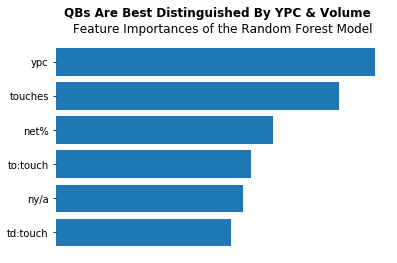

In [17]:
# plot model's feature importances
import matplotlib.pyplot as plt

fis = list(zip(stats, model_rfc.feature_importances_))
fis.sort(key=lambda x: x[1])

x = list(map(lambda x: x[0], fis))
y = list(map(lambda x: x[1], fis))
plt.barh(x, y)
plt.suptitle('QBs Are Best Distinguished By YPC & Volume',
             fontweight='bold',
             y=0.99)
plt.title('Feature Importances of the Random Forest Model')
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([], visible=False)
plt.show()

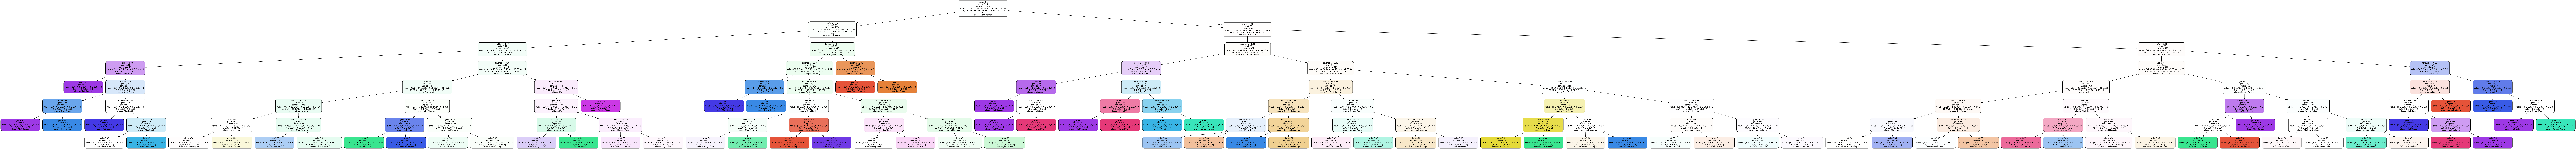

In [18]:
# show example tree from model
from sklearn.tree import export_graphviz
import pydot
from subprocess import call
from IPython.display import Image

export_graphviz(model_rfc.estimators_[-4],
                out_file='rf-tree.dot',
                feature_names=stats,
                class_names=labels,
                rounded=True,
                proportion=False,
                precision=2,
                filled=True)

(graph,) = pydot.graph_from_dot_file('rf-tree.dot')
graph.write_png('rf-tree.png')

Image(filename='rf-tree.png')